# Exploratory Data Analysis with Pandas

Whenever you receive a new dataset, you should perform some form of EDA. The main things you should be doing are:
* getting a feel for what the data look like
* establishing what types the data have
* identifying any potential issues that need cleaning
* considering whether there may be any issues when it comes to modelling the dataset

For this example, we haven't given you an explicit modelling task to think of whilst you perform this task. This can happen in real life too - "what can you do with this data?" is a legitimate question you may receive. Think about what you might be able to model from this data whilst you get to know the dataset. How might your model be useful to the dataset's owner?

## Module load

Please import the libraries you'll need for data analysis: `numpy`, `pandas`, `matplotlib.pyplot`, and `seaborn`

In [60]:
# Import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The below is not recommended in general, but will clean up this notebook (there are some issues with seaborn plots kicking out warnings which are a bit messy). Feel free to comment this out if you want to see the warnings.

In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading

Load `retail_data.csv` using the relevant pandas method. Make `"CustomerID"` the index of the DataFrame. Print the first few lines to check your import looks ok.

In [62]:
# Import the data
customers_wrong = pd.read_csv('data/retail_data.csv')

In [63]:
customers_wrong.head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1.0,NaN,196.0,0.0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,NaN,530.0,0.0,0.00,1079.40


In [64]:
# Import the data
customers = pd.read_csv('data/retail_data.csv', 
                         index_col="CustomerID")

In [65]:
customers.head()

,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,,
12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
12350,Norway,294.40,294.4,294.400000,294.4,1.0,NaN,196.0,0.0,0.00,294.40
12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,NaN,530.0,0.0,0.00,1079.40


In [66]:
customers.iloc[0]

Country                 United Kingdom
balance                              0
max_spent                      77183.6
mean_spent                     38591.8
min_spent                            0
n_orders                             2
time_between_orders                NaN
total_items                      74215
total_items_returned            -74215
total_refunded                -77183.6
total_spent                    77183.6
Name: 12346, dtype: object

In [67]:
# Print a few rows of the DataFrame
customers.head(10)

,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,,
12346,United Kingdom,0.00,77183.60,38591.800000,0.00,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
12348,Finland,3874.60,2248.80,1291.533333,478.80,3.0,54.500000,6876.0,0.0,0.00,3874.60
12350,Norway,294.40,294.40,294.400000,294.40,1.0,NaN,196.0,0.0,0.00,294.40
12352,Norway,1845.13,1054.10,393.092000,0.00,5.0,11.333333,774.0,-63.0,-120.33,1965.46
12354,Spain,1079.40,1079.40,1079.400000,1079.40,1.0,NaN,530.0,0.0,0.00,1079.40
12356,Portugal,6621.63,5011.34,3310.815000,1610.29,2.0,80.000000,4455.0,0.0,0.00,6621.63
12358,Austria,404.86,404.86,404.860000,404.86,1.0,NaN,98.0,0.0,0.00,404.86
12360,Austria,4359.34,2984.60,2179.670000,1374.74,2.0,88.000000,2116.0,0.0,0.00,4359.34
12361,Belgium,174.90,174.90,174.900000,174.90,1.0,NaN,90.0,0.0,0.00,174.90


## Understanding the data

The first thing to do is to check the import has definitely worked ok and to get an overview:
1. Get the shape of the data
1. Print some basic statistics about the distribution of each feature e.g. mean, standard deviation, or nr unique values etc. (hint: there is a DataFrame method for this)
1. Get the types of all the data. Do they look right? (answer: they're not strictly right, think about why. However, you don't actually need to edit their types for all the following functions to work)
1. Check missing values in the data - can and should they be cleaned? How would this be handled during the modelling stage?

In [68]:
customers = customers.reset_index()

In [69]:
customers.head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1.0,NaN,196.0,0.0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,NaN,530.0,0.0,0.00,1079.40


In [70]:
# shape
customers.shape

(3254, 12)

In [71]:
?customers.describe

In [72]:
customers.describe()

,CustomerID,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
count,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,1886.000000,3254.000000,3254.000000,3254.000000,3254.000000
mean,15331.364167,3595.679152,1241.132434,697.714203,336.855298,4.025814,57.565366,2163.921942,-41.103872,-59.520221,3655.199373
std,1705.821179,12287.159793,2765.253795,1105.379255,592.529725,6.330090,45.195702,6964.880540,1323.201566,1418.811921,12427.666932
min,12346.000000,-1192.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-74215.000000,-77183.600000,0.000000
25%,13867.500000,330.807500,298.307500,215.720000,0.000000,1.000000,27.000000,175.000000,-3.000000,-12.400000,336.337500
50%,15302.000000,948.595000,658.430000,463.260000,150.000000,2.000000,45.250000,533.000000,0.000000,0.000000,961.725000
75%,16804.750000,3198.430000,1358.170000,852.338786,418.197500,4.000000,76.666667,1885.500000,0.000000,0.000000,3217.837500
max,18287.000000,394689.180000,77183.600000,38591.800000,9885.320000,134.000000,253.000000,148977.000000,0.000000,0.000000,394689.180000


In [73]:
# stats
customers.describe(include='all')

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
count,3254.000000,3254,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,1886.000000,3254.000000,3254.000000,3254.000000,3254.000000
unique,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15331.364167,NaN,3595.679152,1241.132434,697.714203,336.855298,4.025814,57.565366,2163.921942,-41.103872,-59.520221,3655.199373
std,1705.821179,NaN,12287.159793,2765.253795,1105.379255,592.529725,6.330090,45.195702,6964.880540,1323.201566,1418.811921,12427.666932
min,12346.000000,NaN,-1192.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-74215.000000,-77183.600000,0.000000
25%,13867.500000,NaN,330.807500,298.307500,215.720000,0.000000,1.000000,27.000000,175.000000,-3.000000,-12.400000,336.337500
50%,15302.000000,NaN,948.595000,658.430000,463.260000,150.000000,2.000000,45.250000,533.000000,0.000000,0.000000,961.725000
75%,16804.750000,NaN,3198.430000,1358.170000,852.338786,418.197500,4.000000,76.666667,1885.500000,0.000000,0.000000,3217.837500


In [74]:
# data types as imported
# These aren't quite right:
# 1. some of the floats are definitely integers
# 2. country is a categorical variable - there is a data type for that in pandas that you can use
# however, functions below will handle the data like this just fine, treating Country as categorical for instance.
customers.dtypes

CustomerID                int64
Country                  object
balance                 float64
max_spent               float64
mean_spent              float64
min_spent               float64
n_orders                float64
time_between_orders     float64
total_items             float64
total_items_returned    float64
total_refunded          float64
total_spent             float64
dtype: object

Are there any rows which contain missing data? Print them (hint: use the methods `isnull()` and `any()` find all the rows which contain one or more missing values).

In [75]:
customers.isnull().head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False


In [76]:
customers.isnull().any(axis=1).head()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [77]:
# Print missing value rows
customers[customers.isnull().any(axis=1)].head(10)

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.60,38591.80,0.00,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
2,12350,Norway,294.40,294.40,294.40,294.40,1.0,NaN,196.0,0.0,0.00,294.40
4,12354,Spain,1079.40,1079.40,1079.40,1079.40,1.0,NaN,530.0,0.0,0.00,1079.40
6,12358,Austria,404.86,404.86,404.86,404.86,1.0,NaN,98.0,0.0,0.00,404.86
8,12361,Belgium,174.90,174.90,174.90,174.90,1.0,NaN,90.0,0.0,0.00,174.90
10,12364,Belgium,1840.52,1840.52,1840.52,1840.52,1.0,NaN,1656.0,0.0,0.00,1840.52
11,12373,Austria,324.60,324.60,324.60,324.60,1.0,NaN,196.0,0.0,0.00,324.60
13,12378,Switzerland,4008.62,4008.62,4008.62,4008.62,1.0,NaN,2529.0,0.0,0.00,4008.62
14,12379,Belgium,1117.63,1119.58,559.79,0.00,2.0,NaN,610.0,-1.0,-1.95,1119.58
15,12380,Belgium,1632.25,1632.25,1632.25,1632.25,1.0,NaN,798.0,0.0,0.00,1632.25


There are actually many...but you'll see that this makes sense given the data. Are there any rows that have missing values apart from this obvious column? Rewrite the cell above and write code to check (tip: you can use `.drop`).

In [78]:
customers.head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1.0,NaN,196.0,0.0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,NaN,530.0,0.0,0.00,1079.40


In [79]:
customers.drop('time_between_orders', axis=1).head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,74215.0,-74215.0,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,6876.0,0.0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1.0,196.0,0.0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,774.0,-63.0,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,530.0,0.0,0.00,1079.40


In [80]:
assert customers.drop('time_between_orders', axis=1).isnull().any(axis=0).sum() == 0

In [81]:
# Other missing value columns?
customers[customers.drop('time_between_orders', axis=1).isnull().any(axis=1)]

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent


As a bonus, write some code which checks if a column looks more like an integer than a float value. Skip this if you can't do it quickly (it's not necessary for what comes next).

In [82]:
customers.dtypes

CustomerID                int64
Country                  object
balance                 float64
max_spent               float64
mean_spent              float64
min_spent               float64
n_orders                float64
time_between_orders     float64
total_items             float64
total_items_returned    float64
total_refunded          float64
total_spent             float64
dtype: object

In [83]:
col_series = customers['max_spent']

In [84]:
(col_series.astype('int') == col_series).sum()

186

In [85]:
( customers['max_spent'].astype('int')== customers['max_spent'] ).sum()

186

In [86]:
for col in customers.columns:
    print(col)

CustomerID
Country
balance
max_spent
mean_spent
min_spent
n_orders
time_between_orders
total_items
total_items_returned
total_refunded
total_spent


In [87]:
# BONUS: skip if stuck. Find integer columns
for col in customers.columns:
    col_series = customers[col]
    dtype = col_series.dtype
    has_missing = col_series.isnull().any()
    if dtype == np.dtype('float64') and not has_missing:
        if (col_series.astype('int') == col_series).sum() == col_series.shape[0]:
            print('{} looks like an integer'.format(col))
            print('Converting it to an integer')
            customers[col] = customers[col].astype('int')
customers.dtypes

n_orders looks like an integer
Converting it to an integer
total_items looks like an integer
Converting it to an integer
total_items_returned looks like an integer
Converting it to an integer


CustomerID                int64
Country                  object
balance                 float64
max_spent               float64
mean_spent              float64
min_spent               float64
n_orders                  int32
time_between_orders     float64
total_items               int32
total_items_returned      int32
total_refunded          float64
total_spent             float64
dtype: object

### ========================== QUESTIONS ==========================

To be good at EDA, you need to be able to quickly answer simple questions about the data. As you become more proficient at pandas, and using `.groupby`, `.apply`, and other methods, you'll become very fast at answering quick questions. [This is a great link](https://pandas.pydata.org/pandas-docs/stable/groupby.html) to the pandas docs which outlines methods you'll find useful.

Below are a series of questions which are reasonable first questions to ask about the data. They start simple and increase in difficulty. There are many ways to get the answers and, for that matter, display them. In my sample solutions, I normally opt to plot solutions when it's appropriate and easy to do so. Feel free to print tables, or even write for loops if you prefer!

If you get inspired, ask and answer your own questions. 

This is your chance to investigate and get a feel for this dataset.

#### 1) How many unique customers are there? And, therefore, what is the average number of rows per customer?

In [88]:
# Nr unique customers
nr_customers = customers['CustomerID'].nunique()
nr_customers

3254

In [89]:
nr_customers = customers.CustomerID.nunique()
nr_customers

3254

In [90]:
# Rows per customer
customers.shape[0] / nr_customers

1.0

#### 2) What is the total amount spent by customers? (feel free to display numbers in a nice format)

In [91]:
# sum of total spent
sum_tot_spent = customers.total_spent.sum()
print('{:.1f}'.format(sum_tot_spent))
print(round(sum_tot_spent,1))
print(sum_tot_spent)

11894018.8
11894018.8
11894018.760000002


#### 3) What is the total amount refunded to customers?

In [92]:
customers.head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2,NaN,74215,-74215,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3,54.500000,6876,0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1,NaN,196,0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5,11.333333,774,-63,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1,NaN,530,0,0.00,1079.40


In [93]:
# Total amount refunded
# The only reason I'm using a minus here is for clarity
# If I asked you "how much were you refunded?", you'd
# probably say £3, not minus £3. The column contains 
# only negative values (probably for processing convenience)
sum_tot_refund = -customers.total_refunded.sum()
'{:.2f}'.format(sum_tot_refund)

'193678.80'

#### 4) Assuming the company serving these customers had a balance of 0 at the start, what is their balance now?

In [94]:
# The balance of the conpany right now
'{:.2f}'.format(sum_tot_spent - sum_tot_refund)
# '{:.2e}'.format(customers['balance'].sum())
# The astute will notice that:
# sum_tot_spent - sum_tot_refund = customers['balance'].sum()

'11700339.96'

#### 5) Count the number of customers from each country, and all countries excluding the UK

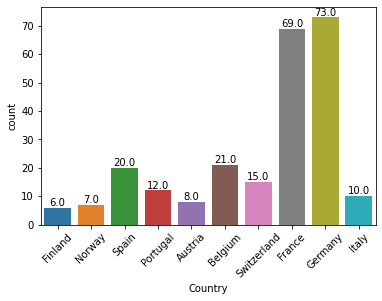

In [95]:
# Count of customers by country - use seaborn!
ax = sns.countplot(customers[customers.Country!='United Kingdom'].Country)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.xticks(rotation=45)
plt.show()

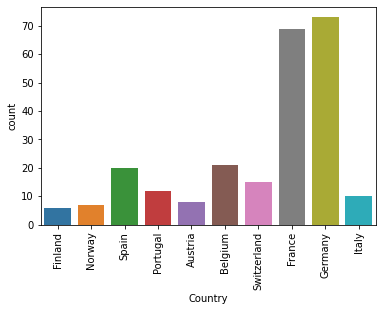

In [96]:
# ...excluding UK
sns.countplot(customers.Country[customers.Country != 'United Kingdom'])
plt.xticks(rotation=90)
plt.show()

#### 6) What is the distribution of the number of orders customers have made? If the distribution is hard to visualise or unclear, try splitting the range up somehow

In [97]:
np.mean(customers.n_orders  < 20 )

0.9769514443761524

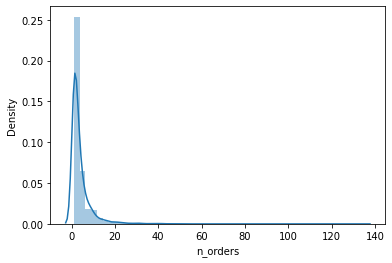

In [98]:
# Distribution of number of orders each customer makes
sns.distplot(customers['n_orders'], bins=50)
plt.show()

In [99]:
customers.columns

Index(['CustomerID', 'Country', 'balance', 'max_spent', 'mean_spent',
       'min_spent', 'n_orders', 'time_between_orders', 'total_items',
       'total_items_returned', 'total_refunded', 'total_spent'],
      dtype='object')

In [100]:
np.percentile( customers.balance, 50)

948.5949999999998

Text(0.5, 1.0, 'my great title ')

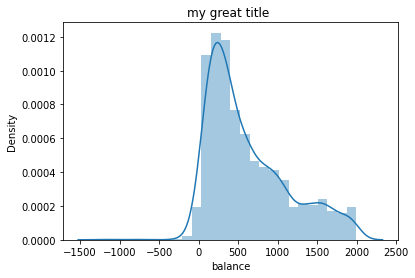

In [101]:
# Distriburtion of the majority of orders
x = 'balance'
query = 'balance <= 2000'
df = customers.query(query)
sns.distplot(df[x], bins=26, rug=False)
#sns.countplot(df[x].astype(int))
#plt.title('{} observations {}'.format(df.shape[0], query))
plt.title('my great title ')

Text(0.5, 1.0, 'my great title ')

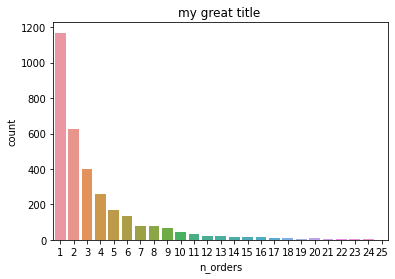

In [102]:
# Distriburtion of the majority of orders
x = 'n_orders'
query = 'n_orders <= 25'
df = customers.query(query)
#sns.distplot(df[x], bins=26, rug=False)
sns.countplot(df[x]) #.astype(int))
#plt.title('{} observations {}'.format(df.shape[0], query))
plt.title('my great title ')

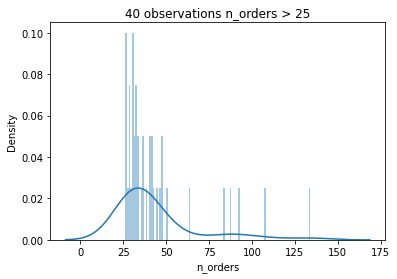

In [103]:
# Distribution of the outliers
x = 'n_orders'
query = 'n_orders > 25'
df = customers.query(query)
sns.distplot(df[x], rug=False, bins=np.arange(25, df[x].max().round()+1))
# sns.countplot(df[x].astype(int))
plt.title('{} observations {}'.format(df.shape[0], query))
plt.show()

#### 7) What is the distribution of the amount spent by customers? Again, if the distribution is hard to visualise, try splitting the range up somehow. Be careful to show that you understand how many observations you are dealing with in each plot.

<AxesSubplot:xlabel='total_spent', ylabel='Density'>

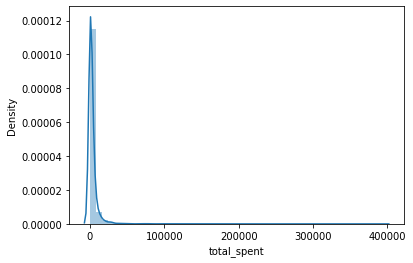

In [104]:
sns.distplot(( customers['total_spent']))

<AxesSubplot:xlabel='total_spent', ylabel='Density'>

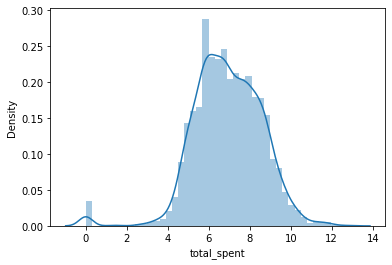

In [105]:
# Distribution of the total spent
sns.distplot(np.log(1 + customers['total_spent']) )


Text(0.5, 1.0, '3231 observations <50k')

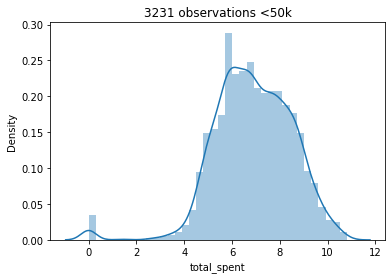

In [106]:
# ...the distribution for the majority of companies
df = customers.query('total_spent < 50000')
sns.distplot( np.log(1+df['total_spent']), rug=False)
plt.title('{} observations <50k'.format(df.shape[0]))

Text(0.5, 1.0, '23 observations >=50k')

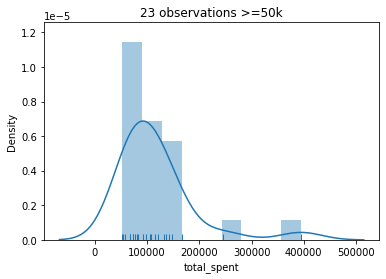

In [107]:
# ...the distribution for the outliers
df = customers.query('total_spent >= 50000')
sns.distplot(df['total_spent'], rug=True)
plt.title('{} observations >=50k'.format(df.shape[0]))


#### 8) How about the distribution of refunds? Again, if prevalent values or outliers are making it difficult to visualise the distribution, split the range somehow.

<AxesSubplot:xlabel='total_refunded', ylabel='Density'>

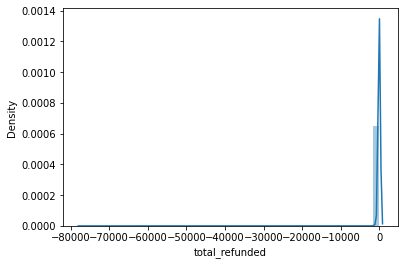

In [108]:
# Distribution of refunds
sns.distplot(customers['total_refunded'])

0.66 of customers have never had a refund
Range of the orders with a refund: (-77183.6, -0.42)


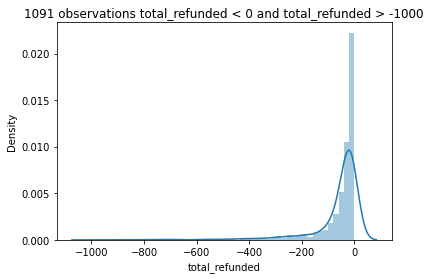

In [109]:
# ...the distribution of the majority
prop_refunded = sum(customers.total_refunded == 0) / customers.shape[0]
print('{:.2f} of customers have never had a refund'.format(prop_refunded))
df = customers.query('total_refunded < 0')
print('Range of the orders with a refund: ({}, {})'.format(
    df['total_refunded'].min(), df['total_refunded'].max()))
query = 'total_refunded < 0 and total_refunded > -1000'
df = customers.query(query)
sns.distplot(df['total_refunded'], rug=False)
plt.title('{} observations {}'.format(df.shape[0], query))
plt.show()


Text(0.5, 1.0, '16 observations total_refunded <= -1000')

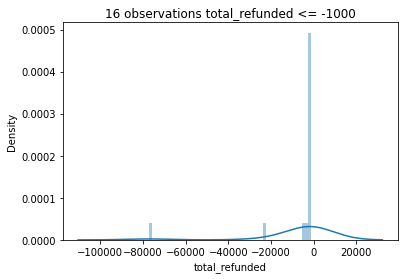

In [110]:
# ...the distribution for the outliers
query = 'total_refunded <= -1000'
df = customers.query(query)
sns.distplot(df['total_refunded'], rug=False)
plt.title('{} observations {}'.format(df.shape[0], query))

#### 9) Use a [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violin#seaborn.violinplot) and/or a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to plot the distribution of the total spent per country 

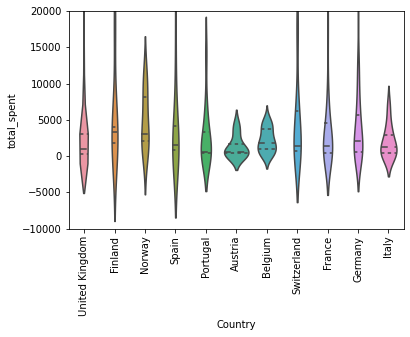

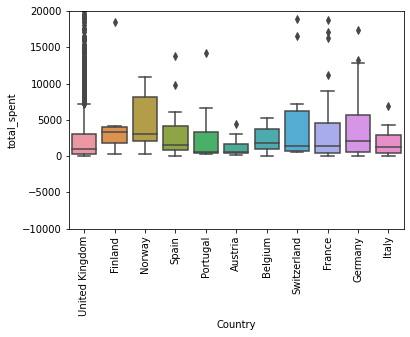

In [111]:
# Violin and box plots of the total spend broken down by country
plt.figure()
sns.violinplot(x="Country", y="total_spent",
               inner="quart",
               data=customers)
plt.xticks(rotation=90)
# there are large outliers which make the plot unhelpful
# I note this, and alter the scale of the y axis to get a better look
y_max = 20000
plt.ylim([-10000, y_max])
plt.show()
plt.figure()
sns.boxplot(x="Country", y="total_spent",
               data=customers)
plt.xticks(rotation=90)
plt.ylim([-10000, y_max])
plt.show()


#### 10a) What is the total amount spent broken down by country? One option here is to use pandas `groupby` to create a `DataFrame` containing the required information, then use `sns.barplot` to plot the infromation.

In [112]:
df_sum_tot_spent = customers['total_spent'].groupby(customers['Country']).sum().reset_index()
#df_sum_tot_spent.columns = ['Country', 'sum of total spent']
df_sum_tot_spent

,Country,total_spent
0,Austria,10619.20
1,Belgium,46252.29
2,Finland,31091.07
3,France,272068.47
4,Germany,325883.91
5,Italy,20046.71
6,Norway,34714.18
7,Portugal,33414.90
8,Spain,95774.83
9,Switzerland,67361.13


In [113]:
# Sum of total spent broken down by country
sum_tot_spent_by_country = (customers['total_spent'] 
         .groupby(customers['Country']) 
         .sum()
         .rename('sum of total spent') 
         .reset_index()  # required to make 'Country' a column for the plot
                           ) # I use these brackets here to allow the methods to chain over newlines - readability
sum_tot_spent_by_country

,Country,sum of total spent
0,Austria,10619.20
1,Belgium,46252.29
2,Finland,31091.07
3,France,272068.47
4,Germany,325883.91
5,Italy,20046.71
6,Norway,34714.18
7,Portugal,33414.90
8,Spain,95774.83
9,Switzerland,67361.13


In [114]:
# Sum of total spent broken down by country
sum_tot_spent_by_country = customers['total_spent'] \
         .groupby(customers['Country']) \
         .sum() \
         .rename('sum of total spent') \
         .reset_index()  # required to make 'Country' a column for the plot
 # I use these brackets here to allow the methods to chain over newlines - readability
sum_tot_spent_by_country

,Country,sum of total spent
0,Austria,10619.20
1,Belgium,46252.29
2,Finland,31091.07
3,France,272068.47
4,Germany,325883.91
5,Italy,20046.71
6,Norway,34714.18
7,Portugal,33414.90
8,Spain,95774.83
9,Switzerland,67361.13


In [115]:
?sns.barplot

In [116]:
customers

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.60,38591.800000,0.00,2,NaN,74215,-74215,-77183.60,77183.60
1,12348,Finland,3874.60,2248.80,1291.533333,478.80,3,54.500000,6876,0,0.00,3874.60
2,12350,Norway,294.40,294.40,294.400000,294.40,1,NaN,196,0,0.00,294.40
3,12352,Norway,1845.13,1054.10,393.092000,0.00,5,11.333333,774,-63,-120.33,1965.46
4,12354,Spain,1079.40,1079.40,1079.400000,1079.40,1,NaN,530,0,0.00,1079.40
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,18280,United Kingdom,180.60,180.60,180.600000,180.60,1,NaN,45,0,0.00,180.60
3250,18281,United Kingdom,80.82,80.82,80.820000,80.82,1,NaN,54,0,0.00,80.82
3251,18282,United Kingdom,98.76,100.21,50.105000,0.00,2,NaN,75,-5,-1.45,100.21
3252,18283,United Kingdom,3049.23,650.96,338.803333,7.50,9,23.250000,2063,0,0.00,3049.23


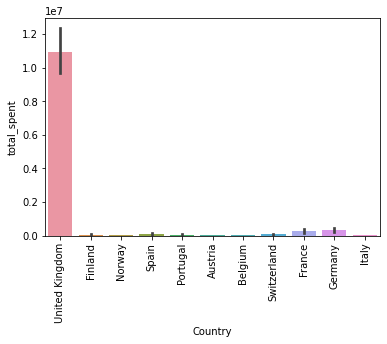

In [118]:
sns.barplot(x='Country', y='total_spent', data=customers, estimator=np.sum)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Plot the data
sns.barplot(x='Country', y='sum of total spent', data=sum_tot_spent_by_country)
plt.xticks(rotation=90)
plt.show()


#### 10b) Again, as might be expected, there is one dominant country. Plot the data again, but exclude the dominant country. In the title of the graph, write explicitly what proportion of the total spent is shown in the plot.

In [ ]:
# Plot of total spend broken down by country, excluding UK
df = sum_tot_spent_by_country.query('Country != "United Kingdom"')
sns.barplot(x='Country', y='sum of total spent', data=df)
prop_uk_spending = customers.query('Country == "United Kingdom"')['total_spent'].sum() / sum_tot_spent
plt.title('{:.3f} of total spent is not from UK'.format(1 - prop_uk_spending))
plt.xticks(rotation=90)
plt.show()


#### 10c) What is the average amount spent per country? (Hint: you'll be able to use very similar code to the analysis summing the total spent)

In [ ]:
# Mean total_spent by country
avg_spend_by_country = (
    customers['total_spent']
         .groupby(customers['Country'])
         .mean()
         .rename('mean spent by customers')
         .reset_index()  # required to make 'Country' a column for the plot
)
sns.barplot(x='Country', y='mean spent by customers', data=avg_spend_by_country)
plt.xticks(rotation=90)
plt.show()
avg_spend_by_country


#### 10d) Bonus: (move on if not solved in a few mins) -- What is the average amount spent *per order* per country (there is a column `n_orders`)? Hint: be careful...the mean of the column `mean_spent` per country is not the same as the desired quantity e.g. $\frac{\frac{10}{5} + \frac{20}{4}}{2} \ne \frac{10 + 20}{5+4}$...my solution first makes a function which calculates the mean spend per order for a given dataframe, then I use `apply` to apply this to each country using a `groupby`.

In [ ]:
# Mean amount spent per order broken down by country
# N.B. as hinted in the questions, taking the mean of mean_spent grouped by country is not correct
def mean_spent_per_order(df):
    total_orders = df.n_orders.sum()
    total_spent = df.total_spent.sum()
    return total_spent/total_orders
print('Mean spent per order in the dataset = £{:.2f}'.format(mean_spent_per_order(customers)))

avg_order_spend_by_country = (
    customers
         .groupby(customers['Country'])
         .apply(mean_spent_per_order)
         .rename('mean spend per order')
         .reset_index()  # required to make 'Country' a column for the plot
) # I use these brackets here to allow the methods to chain over newlines - readability
print(avg_order_spend_by_country)

sns.barplot(x='Country', y='mean spend per order', data=avg_order_spend_by_country)
plt.axhline(mean_spent_per_order(customers), color='black', linestyle='dashed', linewidth=2, label='dataset mean')
plt.legend()
plt.xticks(rotation=90)
plt.show()


# EXTRA ==============
# A little bonus for your efforts - see how easy it is to change this analysis to "mean spent per *item*"
def mean_spent_per_item(df):
    total_items = df.total_items.sum()
    total_spent = df.total_spent.sum()
    return total_spent/total_items
print('Mean spent per item in the dataset = £{:.2f}'.format(mean_spent_per_item(customers)))

avg_item_spend_by_country = (
    customers
         .groupby(customers['Country'])
         .apply(mean_spent_per_item)
         .rename('mean spend per item')
         .reset_index()  # required to make 'Country' a column for the plot
) # I use these brackets here to allow the methods to chain over newlines - readability
print(avg_item_spend_by_country)
sns.barplot(x='Country', y='mean spend per item', data=avg_item_spend_by_country)
plt.axhline(mean_spent_per_item(customers), color='black', linestyle='dashed', linewidth=2, label='dataset mean')
plt.legend()
plt.xticks(rotation=90)
plt.show()


#### 11a) Since the total number of orders is very skewed, when comparing countries, we should compare proportions. Compare the **proportion** of customers with 1 order vs. 2+ orders for each country. Put this information in one table, or one plot if you can.

In [ ]:
df = customers

x, y, hue = "Country", "prop", "Number of Orders"

one_or_more = lambda x: '1' if x==1 else '>=2'

prop_df = (df['n_orders']
           .apply(one_or_more)
           .rename(hue)
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
plt.xticks(rotation=90)
plt.show()


#### 11b) Use `pd.cut` to repeat the above but with some more interesting range bins

In [ ]:
df = customers
x, y, hue = "n_orders", "prop", "Country"

prop_df = (pd.cut(df[x], [0, 1, 2, 5, 10, np.inf])
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=hue, y=y, hue=x, data=prop_df)
plt.xticks(rotation=90)
plt.show()


#### 12) In your own words, summarise what you've found out about this dataset from your analysis above

In [ ]:
# Interpret your findings above!
# * This is a dataset about orders customers have made with a business
# * The data are aggregated up to the customer level
# * The features are summary statistics about their order history
# -------
# * There is a total spending of 11 million in this dataset (information about 
#   what denomination is not contained in the dataset - it could be cents!)
# * There is comparatively little refunded
# * The customers are mostly from the UK
# * Of customers excluding the UK, France and Germany are most common
# * From simple distribution plots of spending and n_order variables, we can 
#   see we have some companies that are big outliers
# * The pattern is roughly the same regarding the total amount spent
# * The distribution of total spent by customers from each region, the 
#   distributions aren't radically different...but there are a few outliers 
#   with very large spends
# * The mean order is about £1000 (and the mean item cost is a mere £1.69...
#   my bet is that this dataset is about selling office stationary at this 
#   point)
# * For each country, between 30 and 50 percent of customers have submitted
#   only one order (Bonus: germany seems to have loyal customers, over 10%
#   of the customers have ordered 10 times or more!)
# * ...this is by no means an exhaustive list!!!
